1
2


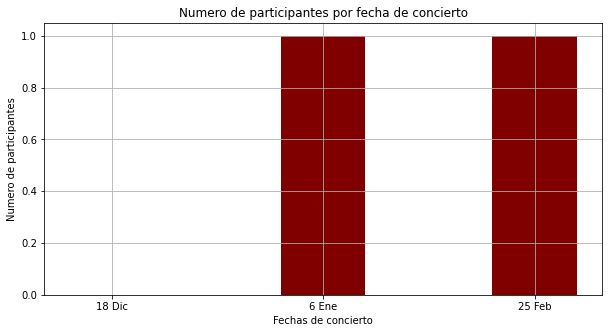

In [20]:
# PROCESADOR DE TICKETS - EMPRESA "TVTICKETS"
from tkinter import *
from tkinter import messagebox
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Creación de la GUI
root = Tk()
root.resizable(0, 0)
root.title("Procesador de Tickets - TVTickets")

# Declaración de clases
class diccionario(dict):
    def __init__(self):
        self = dict()

    def add(self, key, value):
        self[key] = value

# Declaración de variables
datos = diccionario()
datosGrafico = diccionario()
num = 0
nombreActual = ""
apellidoActual = ""

# Declaración de objetos variables
varDNI = IntVar()
varNombre = StringVar()
varApellido = StringVar()
varEdad = IntVar()
varDisc = BooleanVar()
bg = PhotoImage(file= "distribucion.png")

# Declaración de funciones
def validarDNI():
    try:
        if(len(str(varDNI.get()))) == 8:
            pass
        else:
            messagebox.showerror(title= "Error", message= "El DNI debe tener 8 digitos.")
    except:
        messagebox.showerror(title= "Error", message= "Debe ingresar un numero de DNI")

def validarNombre():
    if(varNombre.get().isalpha()):
        pass
    else:
        messagebox.showerror(title= "Error", message= "Debe ingresar un nombre valido")

def validarApellido():
    if(varApellido.get().isalpha()):
        pass
    else:
        messagebox.showerror(title= "Error", message= "Debe ingresar un apellido valido")

def generarIDServicio():
    try:
        num = np.random.randint(1111, 9999)
        nombreActual = entNombre.get()
        apellidoActual = entApellido.get()
        global idServicio
        idServicio = str(varDNI.get())[-4:]

        if(cboxZona.current() == 0):
            idServicio += "RGL"
        elif(cboxZona.current() == 1):
            idServicio += "VIP"
        elif(cboxZona.current() == 2):
            idServicio += "TRB"
        elif(cboxZona.current() == 3):
            idServicio += "PLY"
        elif(cboxZona.current() == 4):
            idServicio += "PLT"
        else:
            messagebox.showerror(title= "Error", message= "Elija una zona")
        
        if(cboxFecha.current() == 0):
            idServicio += "18DIC"
        elif(cboxFecha.current() == 1):
            idServicio += "06ENE"
        elif(cboxFecha.current() == 2):
            idServicio += "25FEB"
        else:
            messagebox.showerror(title= "Error", message= "Elija una fecha")

        idServicio += varNombre.get()[0]
        idServicio += varApellido.get()[0]

        if(varEdad.get() == 1):
            idServicio += "a"
        elif(varEdad.get() == 2):
            idServicio += "m"
        else:
            messagebox.showerror(title= "Error", message= "Elija una opción de edad")

        if(varDisc.get() == True):
            idServicio += "d"
        else:
            idServicio += "n"

        idServicio += str(num)

        auxServicio = idServicio

        global noInfo
        noInfo = False
    except:
        noInfo = True

def cargarValores():
    try:
        datos.add(varDNI.get(), idServicio)
        print(cboxFecha.current())

        global numF1
        global numF2
        global numF3

        if(cboxFecha.current() == 0):
            numF1 += 1
        elif(cboxFecha.current() == 1):
            numF2 += 1
        elif(cboxFecha.current() == 2):
            numF3 += 1
        else:
            pass
    except:
        pass

def procesar():
    try:
        validarDNI()
        validarNombre()
        validarApellido()
        generarIDServicio()
        if noInfo == True:
            btnSig["state"] = "disabled"
        else:
            btnSig["state"] = "normal"
    except:
        pass

def siguiente():
    try:
        cargarValores()
        entDNI.delete(0, END)
        entNombre.delete(0, END)
        entApellido.delete(0, END)
        cboxZona.set('')
        cboxFecha.set('')
        varEdad.set(None)
        chkDisc.deselect()
    except:
        pass

def exportar():
    with open("DATOS.csv", mode= "w", encoding= "utf-8", newline= '') as file:
        writer = csv.writer(file, delimiter= ";")
        writer.writerow(["DNI", "ID DE SERVICIO"])

        for dni, idServ in datos.items():
            writer.writerow([dni, idServ])

def informar():
    ventanaInfo = Toplevel(root)
    ventanaInfo.title("Info")
    ventanaInfo.resizable(0, 0)
    
    Label(ventanaInfo, image= bg).pack()

def graficar():
    ventanaGrafico = Toplevel(root)
    ventanaGrafico.title("Estadisticas")
    ventanaGrafico.resizable(0, 0)

    datosGrafico.add("18 Dic", numF1)
    datosGrafico.add("6 Ene", numF2)
    datosGrafico.add("25 Feb", numF3)

    fechas = list(datosGrafico.keys())
    participantes = list(datosGrafico.values())

    fig = plt.figure(figsize= (10, 5))
    canvas = FigureCanvasTkAgg(fig, ventanaGrafico)

    subventana = fig.add_subplot(1, 1, 1)
    subventana.bar(fechas, participantes, color= "maroon", width= 0.4)
    subventana.set_title("Numero de participantes por fecha de concierto")
    subventana.set_xlabel("Fechas de concierto", color= "k")
    subventana.set_ylabel("Numero de participantes", color= "k")
    canvas.draw()

    canvas.get_tk_widget().pack()

# Declaración de frames
frmBase = Frame(root)
frmInterfaz = Frame(frmBase)
frmInfo = Frame(frmBase)
frmGrafico = Frame(frmBase)

frmBase.pack(padx= 10, pady= 10)
frmInterfaz.pack(padx= 10, pady= 10)
frmInfo.pack(padx= 10, pady= 10)
frmGrafico.pack(padx= 10, pady= 10)

# Gobierna TITULO
lblTitulo = Label(frmInterfaz, text= "PROCESADOR DE TICKETS - TVTICKETS", font= "Arial 12 bold")
lblTitulo.grid(row= 0, column= 2, padx= 5, pady= 5)

# Gobierna DNI y su campo de entrada
lblDNI = Label(frmInterfaz, text= "DNI")
lblDNI.grid(row= 1, column= 0, padx= 5, pady= 5)
entDNI = Entry(frmInterfaz, textvariable= varDNI)
entDNI.grid(row= 1, column= 1, padx= 5, pady= 5)

# Gobierna NOMBRE y su campo de entrada
lblNombre = Label(frmInterfaz, text= "NOMBRE")
lblNombre.grid(row= 2, column= 0, padx= 5, pady= 5)
entNombre = Entry(frmInterfaz, textvariable= varNombre)
entNombre.grid(row= 2, column= 1, padx= 5, pady= 5)

# Gobierna ID, su campo de entrada, radiobuttons y checkbutton
lblApellido = Label(frmInterfaz, text= "APELLIDO")
lblApellido.grid(row= 3, column= 0, padx= 5, pady= 5)
entApellido = Entry(frmInterfaz, textvariable= varApellido)
entApellido.grid(row= 3, column= 1, padx= 5, pady= 5)
rdoAdulto = Radiobutton(frmInterfaz, text= "ADULTO", variable= varEdad, value= 1)
rdoAdulto.grid(row= 3, column= 2, padx= 5, pady= 5)
rdoMenor = Radiobutton(frmInterfaz, text= "MENOR", variable= varEdad, value= 2)
rdoMenor.grid(row= 3, column= 3, padx= 5, pady= 5)
chkDisc = Checkbutton(frmInterfaz, text= "DISCAP.", variable= varDisc)
chkDisc.grid(row= 3, column= 4, padx= 5, pady= 5)

# Gobierna ZONA
lblZona = Label(frmInterfaz, text= "ZONA")
lblZona.grid(row= 4, column= 0, padx= 5, pady= 5)
cboxZona = ttk.Combobox(frmInterfaz, values= ["Regular", "Vip", "Tribuna", "Playa", "Platinum"])
cboxZona.grid(row= 4, column= 1, padx= 5, pady= 5)

# Gobierna FECHA
lblFecha = Label(frmInterfaz, text= "FECHA")
lblFecha.grid(row= 5, column= 0, padx= 5, pady= 5)
cboxFecha = ttk.Combobox(frmInterfaz, values= ["18 Diciembre", "6 Enero", "25 Febrero"])
cboxFecha.grid(row= 5, column= 1, padx= 5, pady= 5)

# Gobierna boton PROCESAR
btnProcesar = Button(frmInterfaz, text= "PROCESAR", command= procesar)
btnProcesar.grid(row= 6, column= 2, padx= 5, pady= 5)

# Gobierna botones SIG., TERM., CSV, GRAPH1 Y GRAPH2
# SIGUIENTE
btnSig = Button(frmInterfaz, text= "SIG.", command= siguiente)
btnSig.grid(row= 7, column= 0, padx= 5, pady= 5)

# CSV
btnCSV = Button(frmInterfaz, text= "CSV", command= exportar)
btnCSV.grid(row= 7, column= 1, padx= 5, pady= 5)

# GRAF 1
btnInfo = Button(frmInterfaz, text= "INFO", command= informar)
btnInfo.grid(row= 7, column= 2, padx= 5, pady= 5)

# GRAF 2
btnGraf = Button(frmInterfaz, text= "GRAF", command= graficar)
btnGraf.grid(row= 7, column= 3, padx= 5, pady= 5)

# TERMINAR
btnSalir = Button(frmInterfaz, text= "SALIR", command= root.destroy)
btnSalir.grid(row= 7, column= 4, padx= 5, pady= 5)

root.mainloop()